# Анализ компьютерных игр

Проведём анализ для интренет-магазина «Стримчик», который продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных:
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г. и нам необходимо спланировать кампанию на 2017-й. 

Файл **games.csvv:**
* `Name` —  название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## План работы над проектом:
1. [Загрузим файл и изучим общую информацию](#1)
2. [Подготовим данные](#2)
3. [Проведем исследовательский анализ данных](#3)
4. [Составим портрет пользователя для каждого региона](#4)
5. [Проверим гипотезы](#5)
6. [Итоговые выводы проекта](#6)

## Основные задачи проекта:
1. Рассчитать суммарные продажи во всех регионах;
2. Рассмотреть как менялись продажи по платформам;
3. Определить какие платформмы лидируют по продажам, растут или падают;
4. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
5. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;
6. Посмотреть на общее распределение игр по жанрам;
7. Определить самые популярные платформы (топ-5) и самые популярные жанры (топ-5);
8. Выяснить влияет ли рейтинг ESRB на продажи в отдельном регионе;
9. Проверить гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports разные.

## Шаг 1. Откроем файл с данным и изучим общую информацию
<a id="1"></a> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as stats
import matplotlib.ticker as ticker
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('games.csv', sep=",")

In [3]:
display(df.head())
display(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [4]:
print('Сумма дубликатов:', df.duplicated().sum())

Сумма дубликатов: 0


Отлично, с данными познакомились, дубликаты не обнаружили, идём дальше.

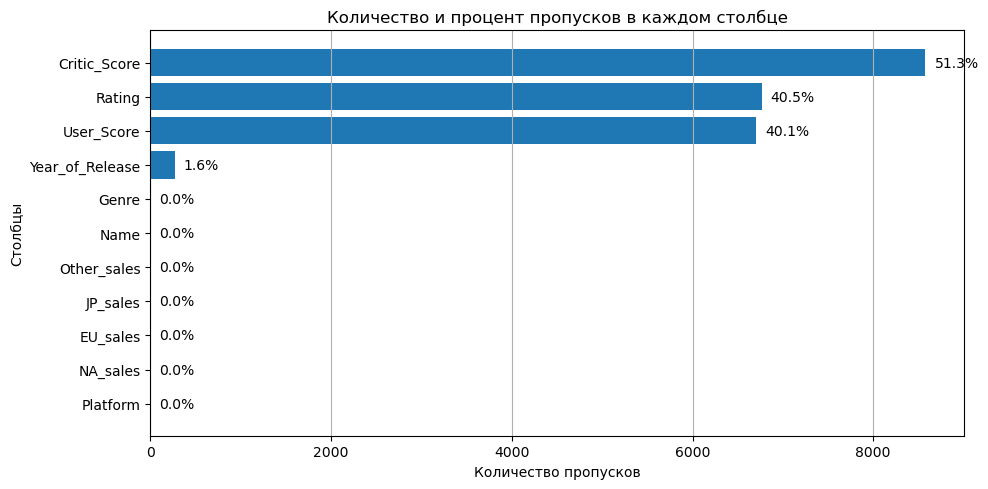

In [5]:
mis_values = df.isnull().sum()
mis_values_count = mis_values.sort_values()

# вычисляем процент пропусков
total_rows = len(df)
mis_values_perc = (mis_values_count / total_rows) * 100

plt.figure(figsize=(10, 5))
bars = plt.barh(mis_values_count.index, mis_values_count)
plt.xlabel('Количество пропусков')
plt.ylabel('Столбцы')
plt.title('Количество и процент пропусков в каждом столбце')

for i, rect in enumerate(bars):
    count = mis_values_count.iloc[i]
    percent = mis_values_perc.iloc[i]
    plt.text(count + 100, i, f'{percent:.1f}%', va='center')

plt.grid(axis='x') 
plt.tight_layout()

plt.show()

Наибольший процент пропусков в столбцах Critic_Score - 51,3%, User_Score - 40,1% и Rating - 40,5%.  
Связанны данные пропуски вероятнее всего с тем, что игры могли быть слишком новы для получения рейтинга и оценок (не успели еще познакомиться с игрой) или наоборот с тем, что игры достаточно старые и оценки ранее не выставлялись. А может и просто в какой-то год/месяц были проблемы с системой сбора информации по заданным столбцам.


## Шаг 2. Подготовим данные к анализу
<a id="2"></a> 

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Поменяем типы данных:
- `year_of_release` на datetime
- `user_score` на float

In [8]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce')

df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype(np.float64)

#### 2.3. Обработаем пропуски.

Пропуски в столбцах `name`, `genre` и `year_of_release` удаляем, т.к. пропусков менее 10%. Пропуски возникли вероятно из-за ошибки при загрузке данных.

В столбцах `critic_score`, `user_score` и `rating` отсутствующие значения могут быть связаны с тем, что игра слишком нова для рейтинга.

In [9]:
# удалим строки с пропусками в стобцах name, genre, year_of_release
df = df.dropna(subset=['name', 'genre', 'year_of_release'])

#### 2.4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [10]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

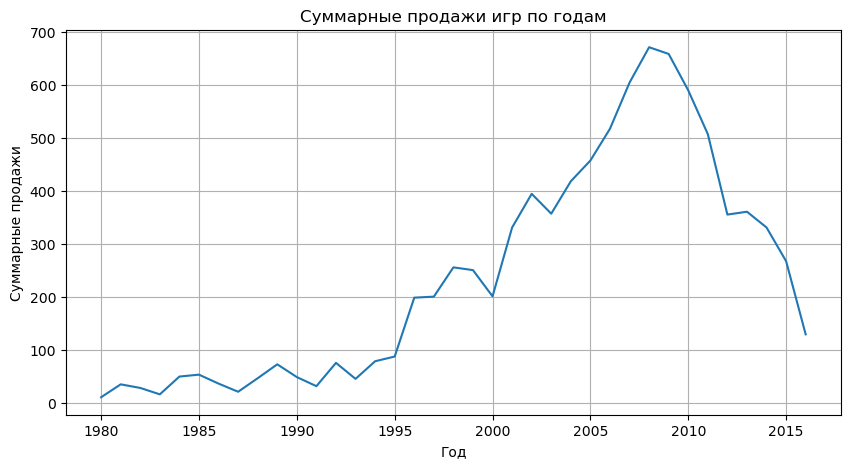

In [11]:
sales_by_year = df.groupby(df['year_of_release'].dt.year)['total_sales'].sum()

plt.figure(figsize=(10, 5))
plt.plot(sales_by_year.index, sales_by_year)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи игр по годам')
plt.show()

Суммарные продажи по играм росли из года в год вплоть до 2008 года, а после суммарные продажи начали падать. Разберемся дальше с чем это может быть связано.  

Удаление строк с отсутствующими значениями в столбцах critic_score, user_score и rating не рекомендуется. Можно было бы заполнить их медианными значениями, но тогда точность дальнейшего анализа будет сомнительной.  

## Шаг 3. Проведем исследовательский анализ данных
<a id="3"></a> 

#### 3.1. Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

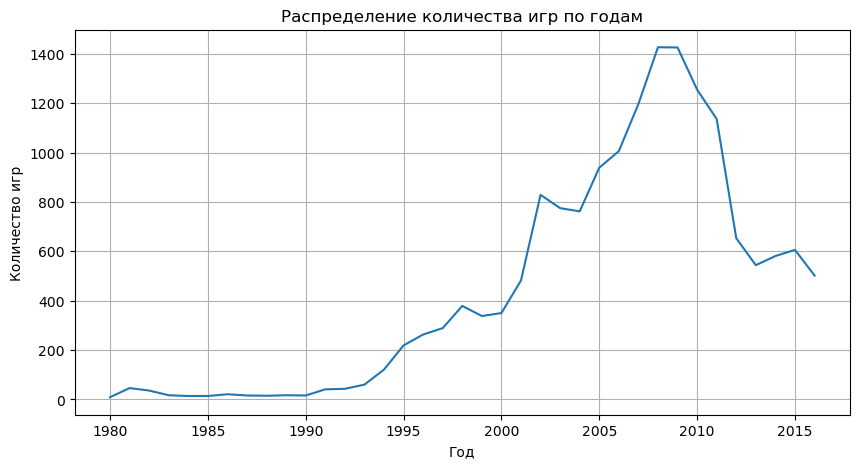

In [12]:
game_count_year = df.groupby(df['year_of_release'].dt.year)['year_of_release'].count()

plt.figure(figsize=(10, 5))
plt.plot(game_count_year.index, game_count_year)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Распределение количества игр по годам')
plt.show()

Расрпостранение и выпуск игр с каждым годом активно растет.  
Как мы заметили ранее - пик приходится на 2008 год, а это потому что в этот год выпущено наибольшее количество игр. Вероятнее это связано с пиком развития игровых консолей и появлением мобильных игр.  
После 2008 года количество выпускаемых игр стало уменьшаться, что может быть связано с новыми требованиями и теперь на разработку игр требовалось больше времени (особенно с появлением новых технологий анимации и спецэффектов).  
Данные за все периоды нам не необходимы, так как очень большое отличие в значении количества игр по разным годам.  

#### 3.2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Рассмотрим за какой характерный срок появляются новые и исчезают старые платформы.

In [13]:
platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

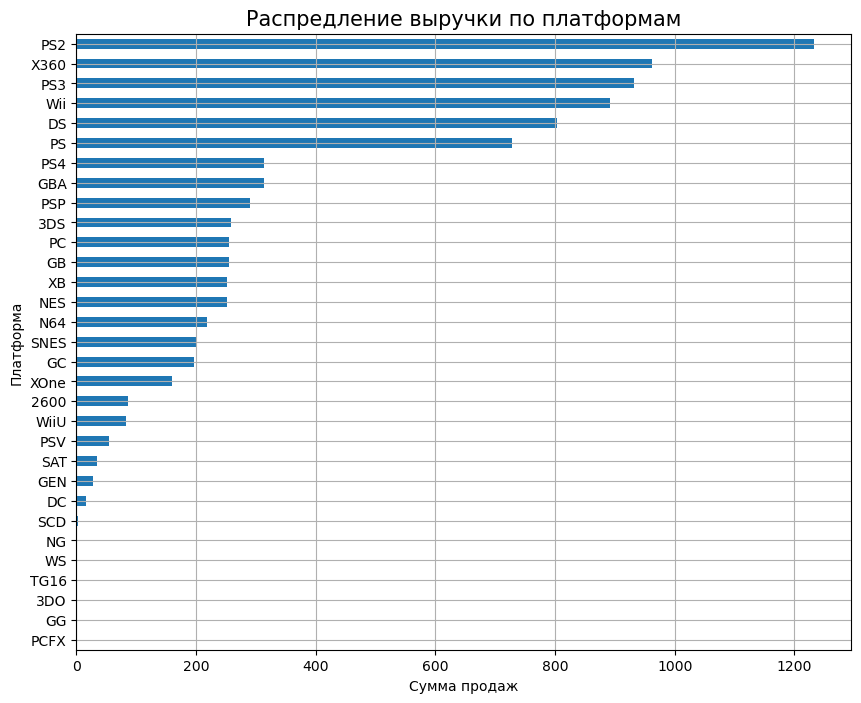

In [14]:
plt.figure(figsize=(10, 8))
platform_total_sales.sort_values().plot(kind='barh')
plt.grid(True)
plt.title('Распредление выручки по платформам', fontsize=15)
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.show()

Топ-5 платформ по суммарному объёму продаж:  
- PS2
- X360
- PS3
- Wii
- DS  
Почему они? Как идея - срок жизни этих платформ в разы выше тех, что представлены во второй (нижней) части графика + они лучше адаптировались к желаниям пользователей и умели находить точки роста там, где другие платформы начинали "умирать".

In [15]:
filtered_df = df[df['year_of_release'] >= '2000/01/01']
top5_platforms = platform_total_sales.head(5).index
top5_platforms_df = filtered_df[filtered_df['platform'].isin(top5_platforms)]
top5_platforms_by_year = top5_platforms_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
top5_platforms_by_year

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2000-01-01,0.00,39.17,0.00,0.00,0.00
2001-01-01,0.00,166.43,0.00,0.00,0.00
2002-01-01,0.00,205.38,0.00,0.00,0.00
2003-01-01,0.00,184.31,0.00,0.00,0.00
2004-01-01,17.27,211.81,0.00,0.00,0.00
2005-01-01,130.14,160.66,0.00,0.00,8.25
2006-01-01,119.81,103.42,20.96,137.15,51.62
2007-01-01,146.94,75.99,73.19,152.77,95.41
2008-01-01,145.31,53.90,118.52,171.32,135.26


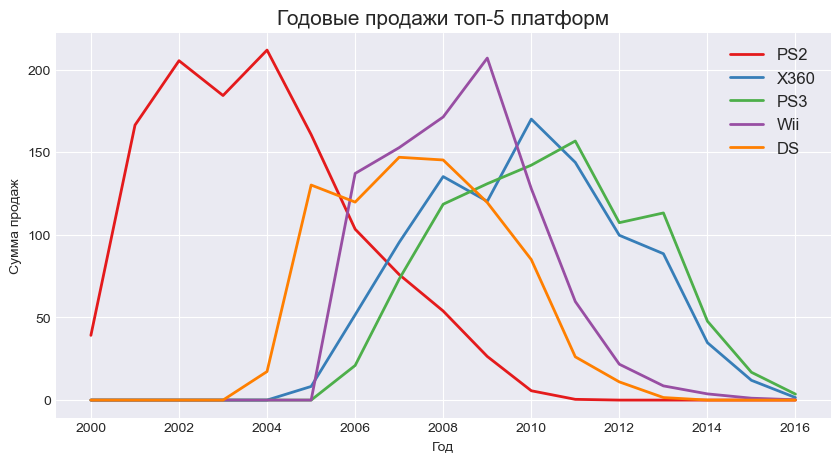

In [16]:
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-darkgrid')  
palette = plt.get_cmap('Set1')  

for i, platform in enumerate(top5_platforms):
    plt.plot(top5_platforms_by_year.index, top5_platforms_by_year[platform], marker='', color=palette(i), linewidth=2, label=platform)

plt.grid(True)
plt.title('Годовые продажи топ-5 платформ', fontsize=15)
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.legend(fontsize=12)
plt.show()

ТОП-5 платформ по годовым продажам:  
- PS2
- X360
- Wii
- PS3
- DS

Заметна сменяемость платформ, что обусловлено развитием технологий и изменением предпочтений потребителей.  
Пики развития платформ видны в первые годы выпуска, а учитывая, что рынок развивается со скоростью света, будем считать актуальными данными за последние 5 лет (2012 - 2016).

#### 3.3. Возьмем данные за соответствующий актуальный период. 

In [17]:
relevant_df = df[(df['year_of_release'].dt.year >= 2012)
                 & (df['year_of_release'].dt.year <= 2016)]

relevant_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


#### 3.4. Рассмотрим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [18]:
platform_sales = relevant_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

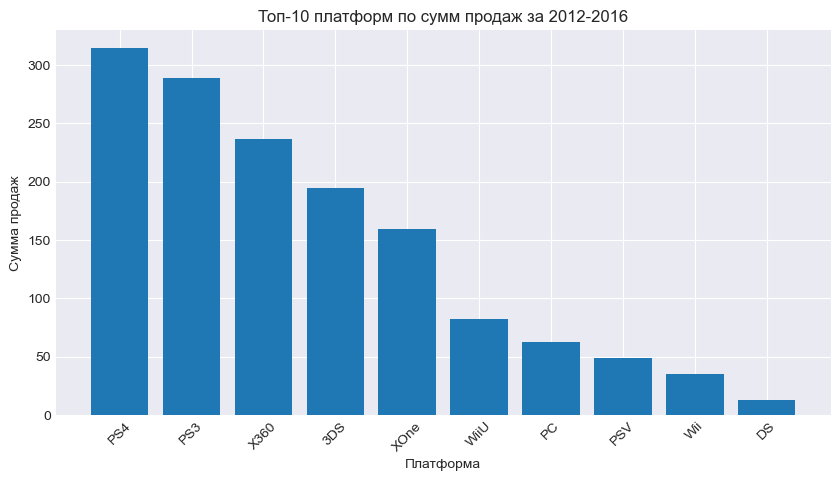

In [19]:
top_platforms = platform_sales.head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_platforms.index, top_platforms)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.title('Топ-10 платформ по сумм продаж за 2012-2016')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

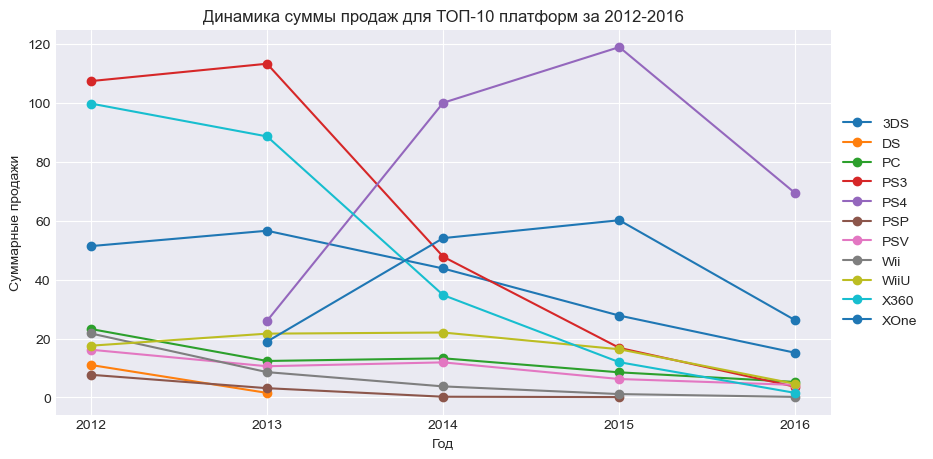

In [20]:
selected_platforms = platform_sales.index 
platform_sales_by_year = relevant_df[relevant_df['platform'].isin(selected_platforms)].groupby(['platform', relevant_df['year_of_release'].dt.year])['total_sales'].sum().unstack(level=0)

plt.figure(figsize=(10, 5))
platform_sales_by_year.plot(marker='o', figsize=(10, 5))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Динамика суммы продаж для ТОП-10 платформ за 2012-2016')
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Лидирующие платформы по продажам:
- PS4
- PS3
- X360
- XOne

Растущие платформы:
- PS4
- XOne

Уменьшающиеся платформы:
- PS3 и X360 с 2013 по 2016 год
- Wii и DS постоянный спад
- 3DS спад с 2013 по 2016 год

Наиболее перспективные платформы - PS4 и XOne.

#### 3.5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

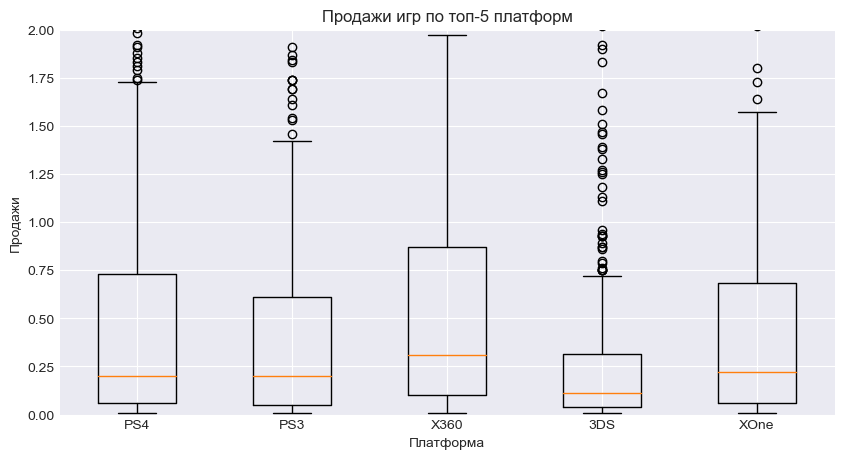

In [21]:
platform_names = platform_sales.index[:5] # выбираем топ-5 платформ по сумме продаж

platform_data = []
for platform in platform_names:
    platform_data.append(relevant_df[relevant_df['platform'] == platform]['total_sales'].values)

plt.figure(figsize=(10, 5))
plt.boxplot(platform_data, labels=platform_names)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Продажи игр по топ-5 платформ')
plt.ylim(0, 2)
plt.show()

X360 лидирует по медиане и самому большому интерквартильному размаху. В среднем медиана глобальных продаж игр на ТОП-5 платформ находится на отметке 0.2 млн.долл.

#### 3.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

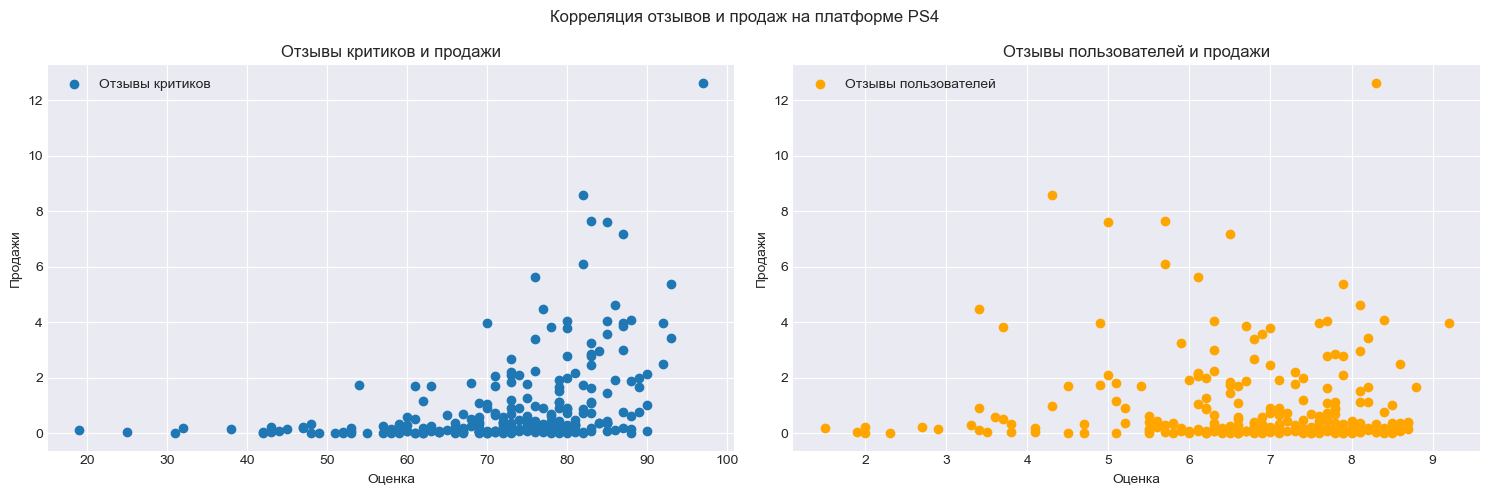

              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.405895
user_score        0.557654    1.000000    -0.033625
total_sales       0.405895   -0.033625     1.000000


In [22]:
selected_platform = 'PS4'

platform_data = df[df['platform'] == selected_platform]
platform_data = platform_data[['user_score', 'critic_score', 'total_sales']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].scatter(platform_data['critic_score'], platform_data['total_sales'], label='Отзывы критиков')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Продажи')
axes[0].set_title('Отзывы критиков и продажи')
axes[0].legend()

axes[1].scatter(platform_data['user_score'], platform_data['total_sales'], label='Отзывы пользователей', color='orange')
axes[1].set_xlabel('Оценка')
axes[1].set_ylabel('Продажи')
axes[1].set_title('Отзывы пользователей и продажи')
axes[1].legend()

plt.suptitle('Корреляция отзывов и продаж на платформе {}'.format(selected_platform))
plt.tight_layout()
plt.show()

correlation = platform_data[['critic_score', 'user_score', 'total_sales']].corr()
print(correlation)

Корреляция продаж и отзывов критиков = 0.4. Вероятно существует связь между этими признаками. Не скажу, что сильная.

Корреляция продаж и отзывов пользователей = -0.03. Между признаками практически отсутсвует линейная связь, отзывы пользователей почти не влияют на продажу игр.

#### 3.7. Соотнесем выводы с продажами игр на других платформах.

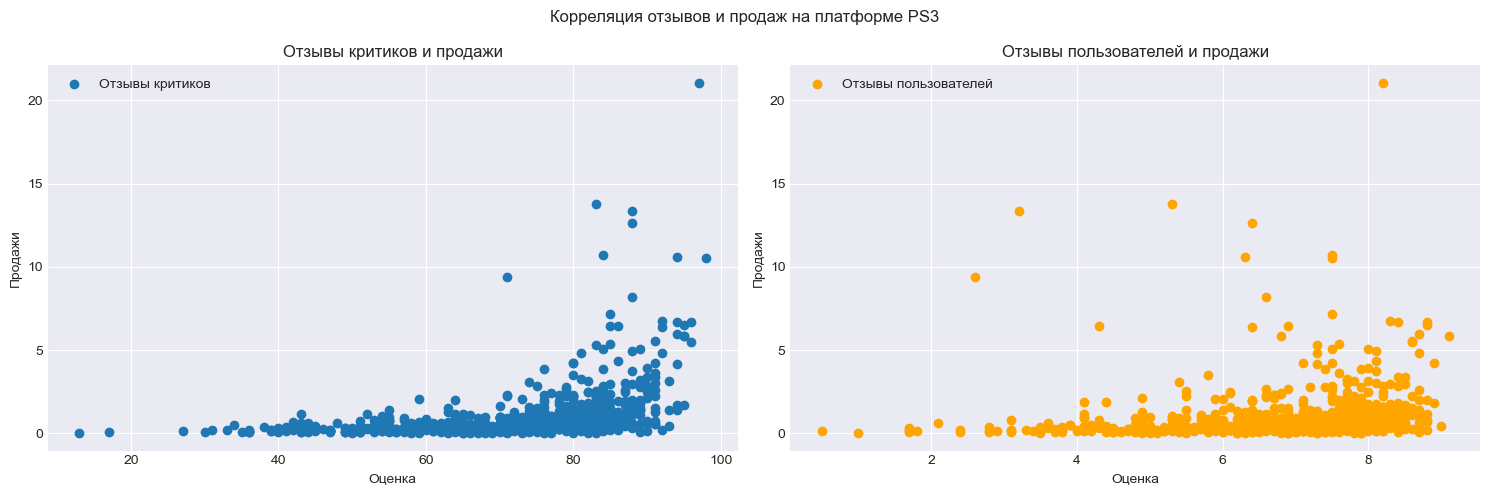

              critic_score  user_score  total_sales
critic_score      1.000000    0.631154     0.428213
user_score        0.631154    1.000000     0.143978
total_sales       0.428213    0.143978     1.000000


In [23]:
selected_platform = 'PS3'

platform_data = df[df['platform'] == selected_platform]
platform_data = platform_data[['user_score', 'critic_score', 'total_sales']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].scatter(platform_data['critic_score'], platform_data['total_sales'], label='Отзывы критиков')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Продажи')
axes[0].set_title('Отзывы критиков и продажи')
axes[0].legend()

axes[1].scatter(platform_data['user_score'], platform_data['total_sales'], label='Отзывы пользователей', color='orange')
axes[1].set_xlabel('Оценка')
axes[1].set_ylabel('Продажи')
axes[1].set_title('Отзывы пользователей и продажи')
axes[1].legend()

plt.suptitle('Корреляция отзывов и продаж на платформе {}'.format(selected_platform))
plt.tight_layout()
plt.show()

correlation = platform_data[['critic_score', 'user_score', 'total_sales']].corr()
print(correlation)

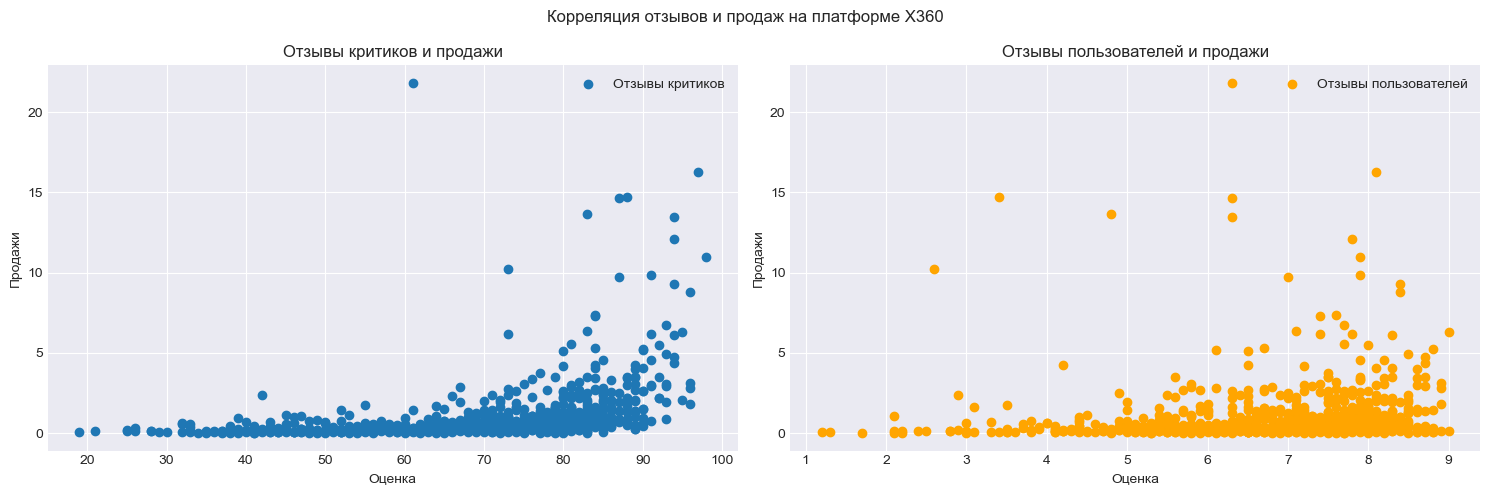

              critic_score  user_score  total_sales
critic_score      1.000000     0.62502     0.388992
user_score        0.625020     1.00000     0.110280
total_sales       0.388992     0.11028     1.000000


In [24]:
selected_platform = 'X360'

platform_data = df[df['platform'] == selected_platform]
platform_data = platform_data[['user_score', 'critic_score', 'total_sales']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].scatter(platform_data['critic_score'], platform_data['total_sales'], label='Отзывы критиков')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Продажи')
axes[0].set_title('Отзывы критиков и продажи')
axes[0].legend()

axes[1].scatter(platform_data['user_score'], platform_data['total_sales'], label='Отзывы пользователей', color='orange')
axes[1].set_xlabel('Оценка')
axes[1].set_ylabel('Продажи')
axes[1].set_title('Отзывы пользователей и продажи')
axes[1].legend()

plt.suptitle('Корреляция отзывов и продаж на платформе {}'.format(selected_platform))
plt.tight_layout()
plt.show()

correlation = platform_data[['critic_score', 'user_score', 'total_sales']].corr()
print(correlation)

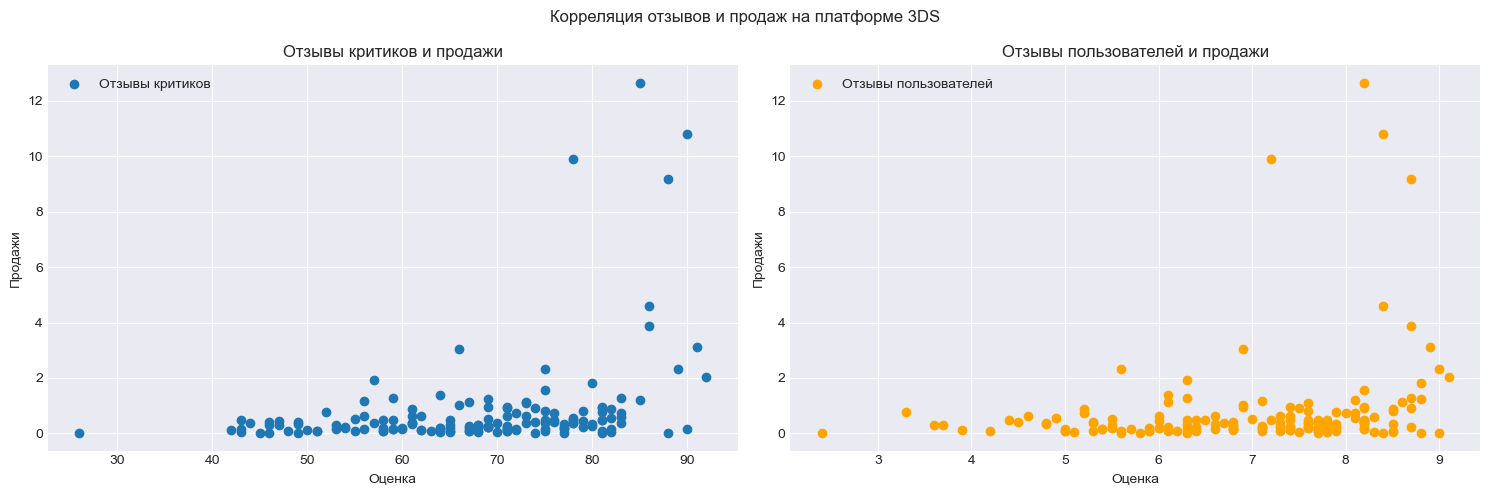

              critic_score  user_score  total_sales
critic_score      1.000000    0.745222     0.338904
user_score        0.745222    1.000000     0.232089
total_sales       0.338904    0.232089     1.000000


In [25]:
selected_platform = '3DS'

platform_data = df[df['platform'] == selected_platform]
platform_data = platform_data[['user_score', 'critic_score', 'total_sales']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].scatter(platform_data['critic_score'], platform_data['total_sales'], label='Отзывы критиков')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Продажи')
axes[0].set_title('Отзывы критиков и продажи')
axes[0].legend()

axes[1].scatter(platform_data['user_score'], platform_data['total_sales'], label='Отзывы пользователей', color='orange')
axes[1].set_xlabel('Оценка')
axes[1].set_ylabel('Продажи')
axes[1].set_title('Отзывы пользователей и продажи')
axes[1].legend()

plt.suptitle('Корреляция отзывов и продаж на платформе {}'.format(selected_platform))
plt.tight_layout()
plt.show()

correlation = platform_data[['critic_score', 'user_score', 'total_sales']].corr()
print(correlation)

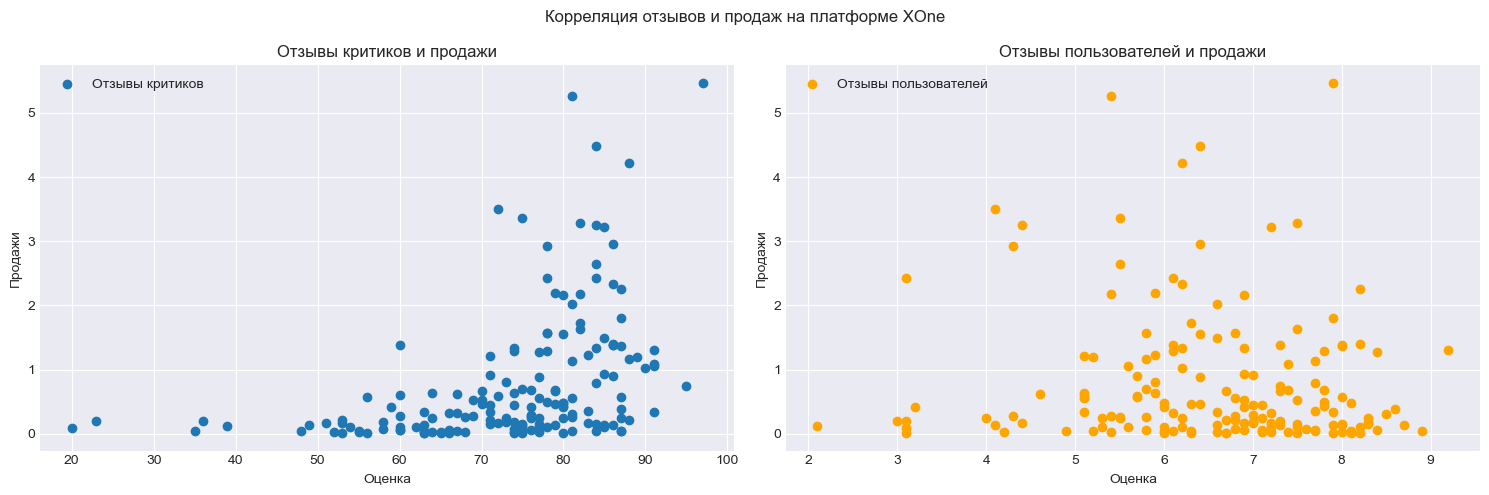

              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.410422
user_score        0.472462    1.000000    -0.094003
total_sales       0.410422   -0.094003     1.000000


In [26]:
selected_platform = 'XOne'

platform_data = df[df['platform'] == selected_platform]
platform_data = platform_data[['user_score', 'critic_score', 'total_sales']].dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

axes[0].scatter(platform_data['critic_score'], platform_data['total_sales'], label='Отзывы критиков')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Продажи')
axes[0].set_title('Отзывы критиков и продажи')
axes[0].legend()

axes[1].scatter(platform_data['user_score'], platform_data['total_sales'], label='Отзывы пользователей', color='orange')
axes[1].set_xlabel('Оценка')
axes[1].set_ylabel('Продажи')
axes[1].set_title('Отзывы пользователей и продажи')
axes[1].legend()

plt.suptitle('Корреляция отзывов и продаж на платформе {}'.format(selected_platform))
plt.tight_layout()
plt.show()

correlation = platform_data[['critic_score', 'user_score', 'total_sales']].corr()
print(correlation)

Диаграммы очень похожи между собой, видна схожая тенденция с диаграммой рассеяния для платформы PS4, следовательно корреляция продаж и отзывов критиков есть, хоть и не очень сильная, а корреляция продаж и отзывов пользователей скорее отсутствует, чем присутствует для любой платформы.

#### 3.8. Посмотрим на общее распределение игр по жанрам.

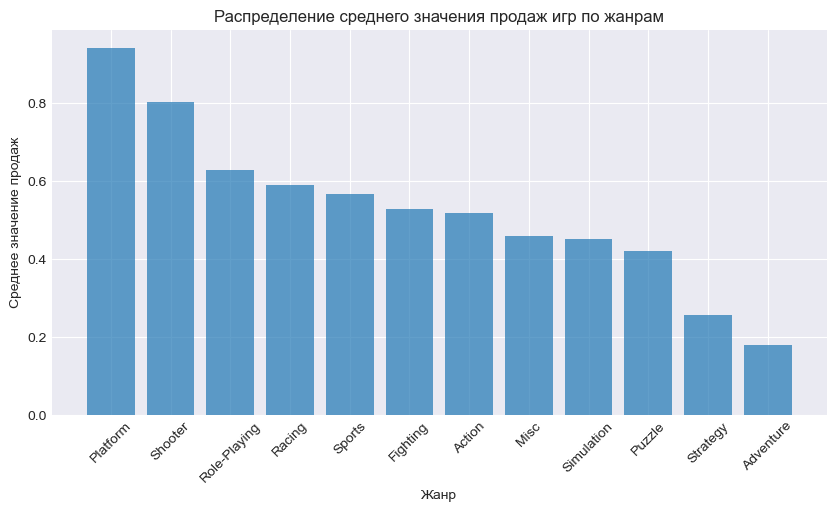

In [27]:
genre_sales_mean = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))

index = np.arange(len(genre_sales_mean))

plt.bar(index, genre_sales_mean, alpha=0.7)
plt.ylabel('Среднее значение продаж')
plt.xlabel('Жанр')
plt.title('Распределение среднего значения продаж игр по жанрам')
plt.xticks(index, genre_sales_mean.index, rotation=45)

plt.show()

Самые высокие средние продажи у игр с жанрами Platform, Shooter и Role-Playung.  
Самые низкие средние продажи у игр с жанрами Strategy и Adventure.

## Шаг 4. Составим портрет пользователя каждого региона
<a id="4"></a> 

#### 4.1. Определим для пользователя каждого региона (NA, EU, JP):

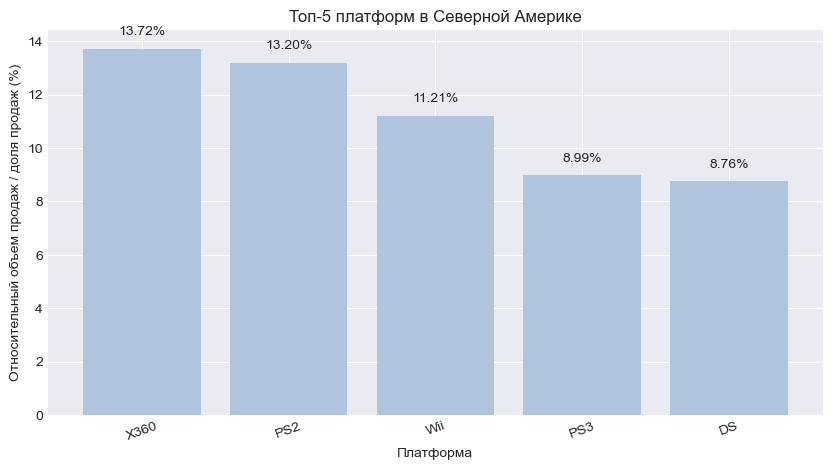

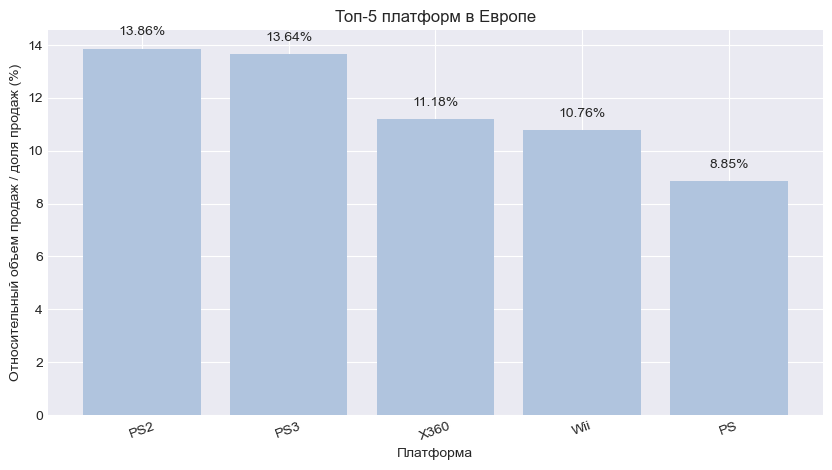

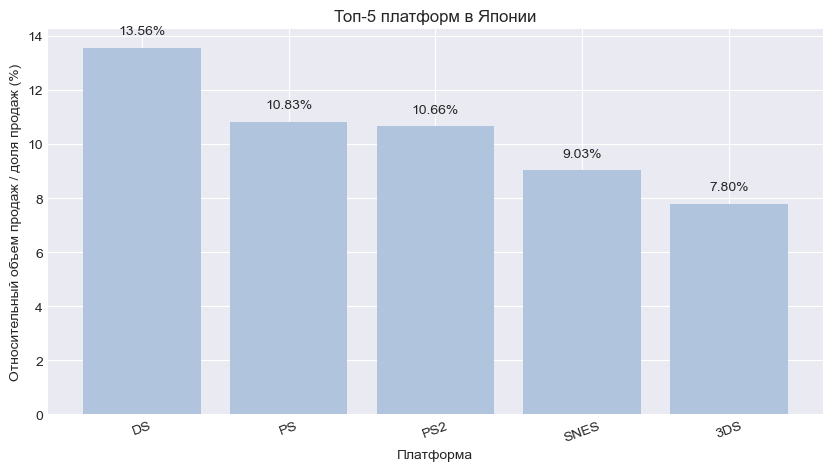

In [28]:
def plot_top_platforms(region_sales, region_name):
    total_sales = df[region_sales].sum()
    pivot = df.groupby('platform')[region_sales].sum().nlargest(5)
    sales_share = (pivot / total_sales) * 100
    relative_sales = pivot / pivot.max()

    plt.figure(figsize=(10, 5))
    bar1 = plt.bar(pivot.index, relative_sales, color='steelblue', label='Относительные продажи')
    bar2 = plt.bar(pivot.index, sales_share, color='lightsteelblue', label='Доля продаж (%)')

    plt.xlabel('Платформа')
    plt.ylabel('Относительный объем продаж / доля продаж (%)')
    plt.title(f'Топ-5 платформ в {region_name}')
    plt.xticks(rotation=20)

    for rect1, rect2 in zip(bar1, bar2):
        height1 = rect1.get_height()
        height2 = rect2.get_height()
        plt.text(rect2.get_x() + rect2.get_width() / 2, height2 + 0.5, f'{height2:.2f}%', ha='center')

    plt.show()

plot_top_platforms('na_sales', 'Северной Америке')
plot_top_platforms('eu_sales', 'Европе')
plot_top_platforms('jp_sales', 'Японии')

В Северной Америке самые попурные платформы - X360, PS2, Wii.  
В Европе самые попурные платформамы - PS2, PS3 и X360.  
В Японии самые попурные платформамы - DS, PS и PS2.

PS2 присутсвует в ТОП-3 в каждом из регионов.  

#### 4.2. Самые популярные платформы (топ-5). Опишим различия в долях продаж.

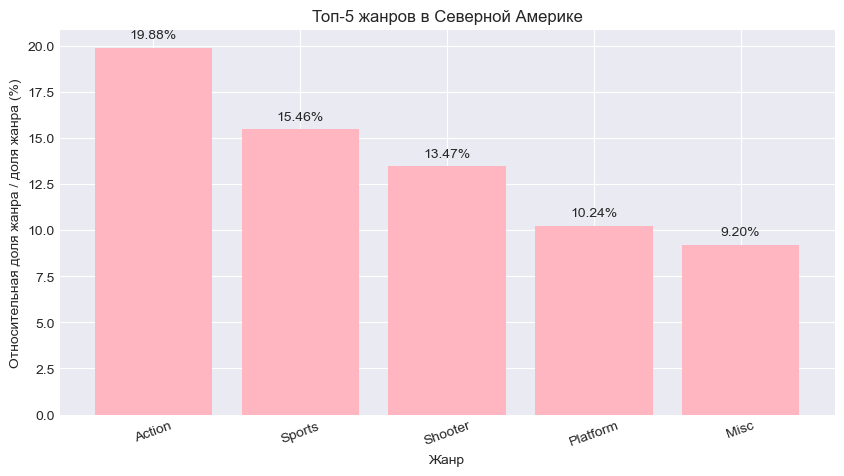

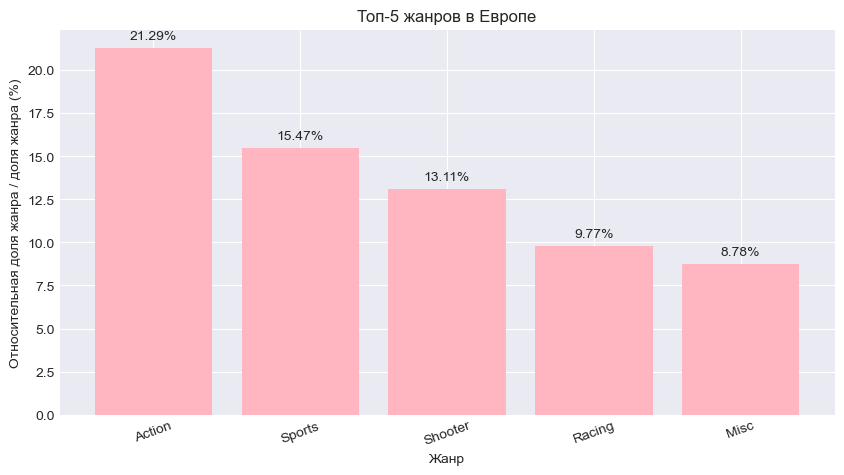

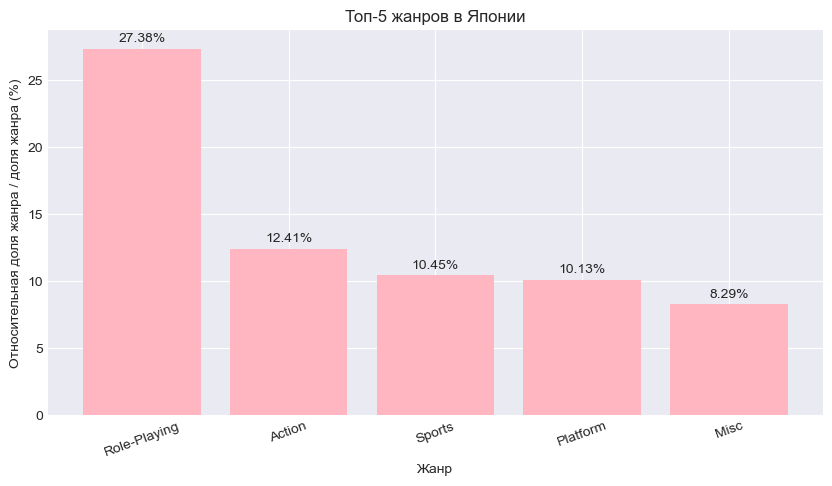

In [29]:
def plot_top_platforms(region_genre, region_name):
    total_sales = df[region_genre].sum()
    pivot = df.groupby('genre')[region_genre].sum().nlargest(5)
    sales_share = (pivot / total_sales) * 100
    relative_sales = pivot / pivot.max()

    plt.figure(figsize=(10, 5))
    bar1 = plt.bar(pivot.index, relative_sales, color='red', label='Относительные продажи')
    bar2 = plt.bar(pivot.index, sales_share, color='lightpink', label='Доля продаж (%)')

    plt.xlabel('Жанр')
    plt.ylabel('Относительная доля жанра / доля жанра (%)')
    plt.title(f'Топ-5 жанров в {region_name}')
    plt.xticks(rotation=20)

    for rect1, rect2 in zip(bar1, bar2):
        height1 = rect1.get_height()
        height2 = rect2.get_height()
        plt.text(rect2.get_x() + rect2.get_width() / 2, height2 + 0.5, f'{height2:.2f}%', ha='center')

    plt.show()

plot_top_platforms('na_sales', 'Северной Америке')
plot_top_platforms('eu_sales', 'Европе')
plot_top_platforms('jp_sales', 'Японии')

В Северной Америке самые попурные жарны - Action, Sports и Shooter.  
В Европе самые попурные жарны - Action, Sports и Shooter.  
В Японии самые популярные жарны - Role-Playing (кстати, только в Японии он в топе, так еще и на первом месте), Action и Sports.

#### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [30]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Расшифровка возрастных категорий:

* `E` - для всех;
* `M` - старше 17 лет;
* `T` - старше 13 лет;
* `E10+` - от 10 лет и старше;
* `K-A` - рейтинг использовался ранее и означал, что игра подходит для детей и взрослых;
* `AO` - старше 18 лет;
* `EC` - от 3 до 6 лет;
* `RP` - нет окончательного рейтинга от ESRB

In [31]:
ESRB_decoding = {'E': 'Для всех', 'M': 'Старше 17 лет', 'T': 'Старше 13 лет', 'E10+': 'От 10 лет и страше', 
                 'K-A': 'Для всех(устар.)', 'A0': 'Старше 18 лет', 'EC': 'От 3 до 6 лет', 
                 'RP': 'Нет окончательного рейтинга от ESRB'}

In [32]:
df['ESRB_description'] = df[df['rating'].notnull()]['rating'].map(ESRB_decoding)

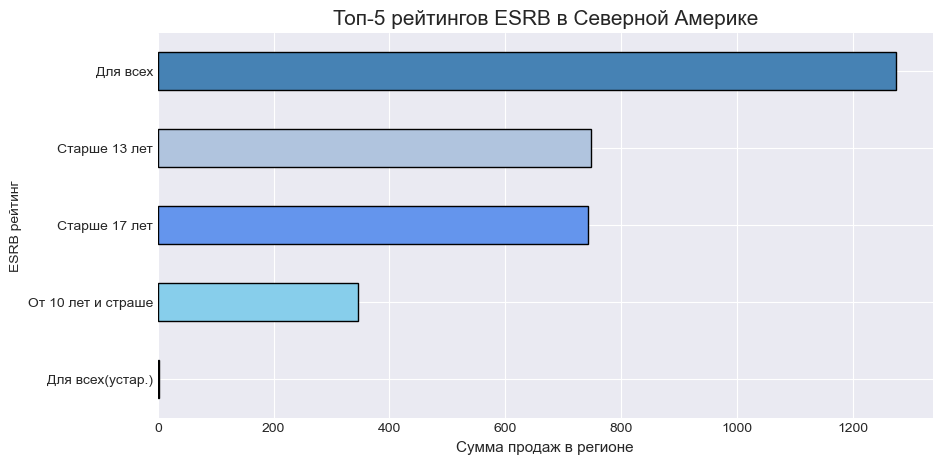

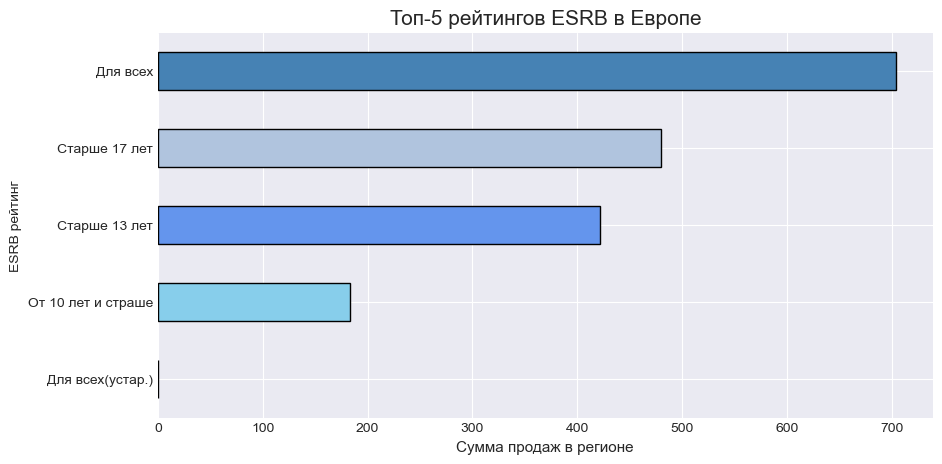

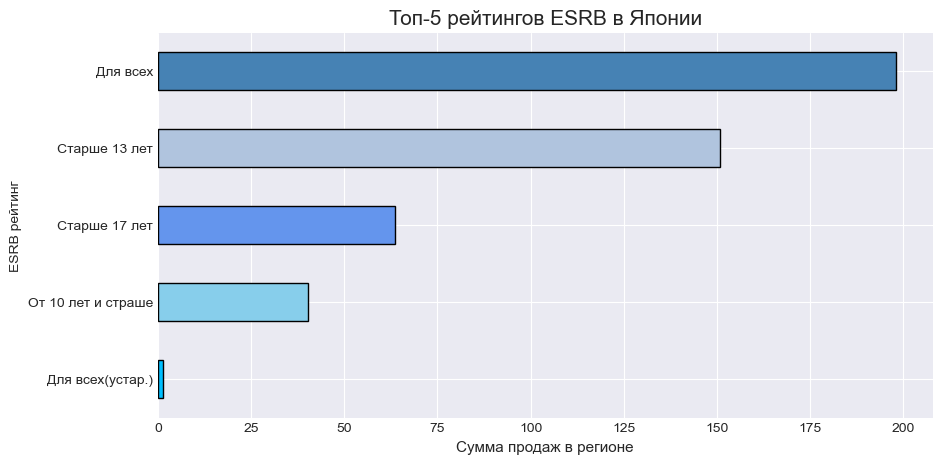

In [33]:
def top_ratings_sales_plot(region_sales, region_name):
    top_ratings = df.groupby('ESRB_description')[region_sales].sum().nlargest(5)
    title = f"Топ-5 рейтингов ESRB в {region_name}"
    colors = ['steelblue', 'lightsteelblue', 'cornflowerblue', 'skyblue', 'deepskyblue']
    plt.figure(figsize=(10, 5))
    top_ratings.plot(kind='barh', color=colors, edgecolor='black')
    plt.title(title, fontsize=15)
    plt.xlabel("Сумма продаж в регионе", fontsize=11)
    plt.ylabel("ESRB рейтинг")
    plt.gca().invert_yaxis()
    plt.show()

top_ratings_sales_plot('na_sales', 'Северной Америке')
top_ratings_sales_plot('eu_sales', 'Европе')
top_ratings_sales_plot('jp_sales', 'Японии')

Топ-5 рейтингов ESRB одинаков для всех регионов.  
В Северной Амереке и Японии совпадает полностью: лидеры "для всех" и "старше 13 лет".  
В Европе лидер так же "для всех", второе место у "старше 17 лет". Вероятно в Европе игры у подростков 13-17 лет не очень популярны, нежели в Северной Америке или Японии.  
Рейтинг игр вляет на продажи. Самые прибыльные игры с рейингом "для всех", "старше 17 лет" и "старше 13 лет".

## Шаг 5. Проверим гипотезы
<a id="5"></a> 

Для проверки гипотез мы будем использовать t-тест Стьюдента, в виду того, что выборки независимы между собой. Значение alpha = 0.05.

#### 5.1. Гипотеза А - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC равны.  
Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [34]:
xbox_one_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

t_statistic, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

alpha = 0.05

print("Гипотеза №1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые")
print('')
print(f"t-статистика: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получаем достаточных доказательств для отвержения нулевой гипотезы")

Гипотеза №1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

t-статистика: -4.671113961085972
p-value: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


P-value сильно меньше 0.05 - отвергаем нулевую гипотезу. Считаю, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

#### 5.2. Гипотеза В - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports равны.  
Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [35]:
action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

t_statistic, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

print("Гипотеза №2: средние пользовательские рейтинги жанров Action и Sports разные.")
print('')
print(f"t-статистика: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получаем достаточных доказательств для отвержения нулевой гипотезы")

Гипотеза №2: средние пользовательские рейтинги жанров Action и Sports разные.

t-статистика: 1.789373351094851
p-value: 0.07370217419278526
Не получаем достаточных доказательств для отвержения нулевой гипотезы


P-value больше 0.05 - нулевую гипотезу не отвергаем. Считаю, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Шаг 6. Итоговые выводы проекта
<a id="6"></a> 

Расрпостранение и выпуск игр с каждым годом активно растет.  
Как мы заметили ранее - пик приходится на 2008 год, а это потому что в этот год выпущено наибольшее количество игр. Вероятнее это связано с пиком развития игровых консолей и появлением мобильных игр.  
После 2008 года количество выпускаемых игр стало уменьшаться, что может быть связано с новыми требованиями и теперь на разработку игр требовалось больше времени (особенно с появлением новых технологий анимации и спецэффектов).  
Данные за все периоды нам не необходимы, так как очень большое отличие в значении количества игр по разным годам.  
ТОП-5 платформ по годовым продажам:  
- PS2
- X360
- Wii
- PS3
- DS

Заметна сменяемость платформ, что обусловлено развитием технологий и изменением предпочтений потребителей.  
Пики развития платформ видны в первые годы выпуска, а учитывая, что рынок развивается со скоростью света, будем считать актуальными данными за последние 5 лет (2012 - 2016).  
Лидирующие платформы по продажам:
- PS4
- PS3
- X360
- XOne

Растущие платформы:
- PS4
- XOne

Уменьшающиеся платформы:
- PS3 и X360 с 2013 по 2016 год
- Wii и DS постоянный спад
- 3DS спад с 2013 по 2016 год

Наиболее перспективные платформы - PS4 и XOne.  

X360 лидирует по медиане и самому большому интерквартильному размаху. В среднем медиана глобальных продаж игр на ТОП-5 платформ находится на отметке 0.2 млн.долл.  

Корреляция продаж и отзывов критиков есть, хоть и не очень сильная, а корреляция продаж и отзывов пользователей скорее отсутствует, чем присутствует для любой платформы.  

Самые высокие средние продажи у игр с жанрами Platform, Shooter и Role-Playung.  
Самые низкие средние продажи у игр с жанрами Strategy и Adventure.  

В Северной Америке самые попурные платформы - X360, PS2, Wii.  
В Европе самые попурные платформамы - PS2, PS3 и X360.  
В Японии самые попурные платформамы - DS, PS и PS2.
PS2 присутсвует в ТОП-3 в каждом из регионов.  

Топ-5 рейтингов ESRB одинаков для всех регионов.  
В Северной Амереке и Японии совпадает полностью: лидеры "для всех" и "старше 13 лет".  
В Европе лидер так же "для всех", второе место у "старше 17 лет". Вероятно в Европе игры у подростков 13-17 лет не очень популярны, нежели в Северной Америке или Японии.  
Рейтинг игр вляет на продажи. Самые прибыльные игры с рейингом "для всех", "старше 17 лет" и "старше 13 лет".  

Чтобы рекламная компания былп успешная, необходиимо ориентироваться на ТОПовые платформы в каждом из регионов, особое внимание уделять играм в жанрах Action и Role-Playing и возрастным ограничением "для всех", "страше 13 лет" и "старше 17 лет", также обращать внимание на оценку платформы критиками.